# Лабораторная работа 4. Предварительный анализ данных

Выполнил: Кириллов Данил

## Задание
Имеются данные регионального этапа олимпиады школьников по информатике. Для сохранения персональных данных реальные имена участников заменены именами «Ученик 1», «Ученик 2» и т.д. Олимпиада проходила в 2 тура. В каждом туре предлагалось решить 4 задачи. Максимальный балл за задачу –100. В первый тур относятся задачи A,B,C и D, а во второй –E, F, G, H. Данные о баллах, набранных участниками, представлены в файле «Результаты олимпиады.csv».

In [131]:
import os
from os import path
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd

Читаем данные из файла:

In [132]:
dirname = os.path.abspath(os.curdir) + r'\lab4_data'
df = pd.read_csv(
    path.join(os.sep, dirname, 'Результаты олимпиады.csv'), 
    encoding='cp1251', 
    sep=';'
)
df = df.rename(columns={
    'Фамилия, имя': 'name', 
    'Школа': 'school', 
    'Класс': 'class',
    'Итого   I тур': 'total_1',
    'Итого   II тур': 'total_2',
    'Общий итог': 'total',
    'Место': 'place',
    'Unnamed: 15': 'status'
})
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77 entries, 0 to 76
Data columns (total 16 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   name     77 non-null     object 
 1   school   77 non-null     object 
 2   class    77 non-null     int64  
 3   A        75 non-null     float64
 4   B        76 non-null     float64
 5   C        41 non-null     float64
 6   D        36 non-null     float64
 7   total_1  77 non-null     int64  
 8   E        73 non-null     float64
 9   F        61 non-null     float64
 10  G        64 non-null     float64
 11  H        55 non-null     float64
 12  total_2  77 non-null     int64  
 13  total    77 non-null     int64  
 14  place    77 non-null     int64  
 15  status   27 non-null     object 
dtypes: float64(8), int64(5), object(3)
memory usage: 9.8+ KB


Заполняем пропуски в колонках с результатами за решение задач нулями:

In [133]:
col_to_fill = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H']
df[col_to_fill] = df[col_to_fill].fillna(0)
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77 entries, 0 to 76
Data columns (total 16 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   name     77 non-null     object 
 1   school   77 non-null     object 
 2   class    77 non-null     int64  
 3   A        77 non-null     float64
 4   B        77 non-null     float64
 5   C        77 non-null     float64
 6   D        77 non-null     float64
 7   total_1  77 non-null     int64  
 8   E        77 non-null     float64
 9   F        77 non-null     float64
 10  G        77 non-null     float64
 11  H        77 non-null     float64
 12  total_2  77 non-null     int64  
 13  total    77 non-null     int64  
 14  place    77 non-null     int64  
 15  status   27 non-null     object 
dtypes: float64(8), int64(5), object(3)
memory usage: 9.8+ KB


,name,school,class,A,B,C,D,total_1,E,F,G,H,total_2,total,place,status
0,Ученик 1,Школа 146,10,100.0,100.0,100.0,100.0,400,100.0,100.0,100.0,28.0,328,728,1,Победитель
1,Ученик 2,Школа 9,11,100.0,100.0,100.0,33.0,333,100.0,100.0,100.0,44.0,344,677,2,Победитель
2,Ученик 3,Школа 9,11,100.0,100.0,66.0,63.0,329,100.0,100.0,100.0,44.0,344,673,3,Победитель
3,Ученик 4,Школа 146,11,100.0,100.0,100.0,63.0,363,100.0,68.0,100.0,28.0,296,659,4,Призер
4,Ученик 5,Школа 9,11,100.0,100.0,66.0,63.0,329,100.0,100.0,49.0,28.0,277,606,5,Призер


Анализируем суммарные баллы:

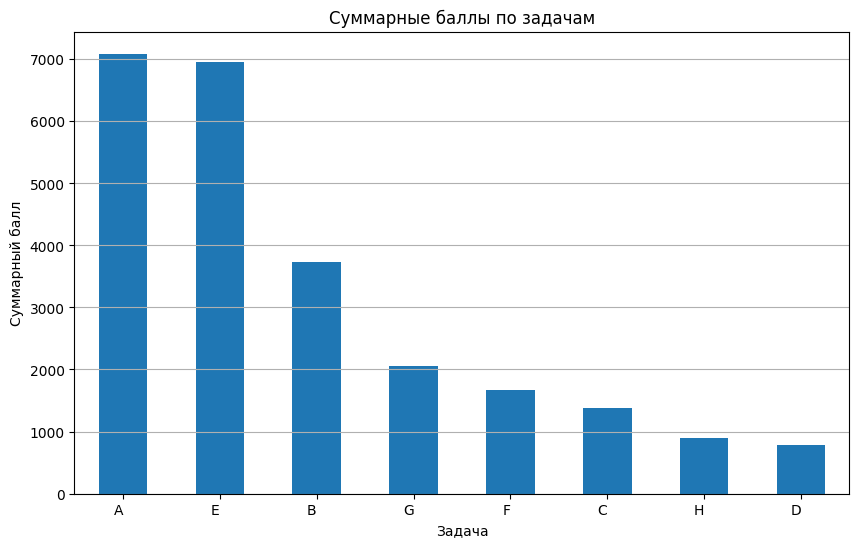

In [134]:
sum_scores = df[['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H']].sum()

# Отсортировываем задачи по убыванию суммарных баллов
sum_scores = sum_scores.sort_values(ascending=False)

# Построение столбиковой диаграммы
plt.figure(figsize=(10, 6))
sum_scores.plot(kind='bar')
plt.title('Суммарные баллы по задачам')
plt.xlabel('Задача')
plt.ylabel('Суммарный балл')
plt.xticks(rotation=0, ha='right')
plt.grid(axis='y')
plt.show()

Попробуем понять какой из туров олимпиады оказался сложнее:

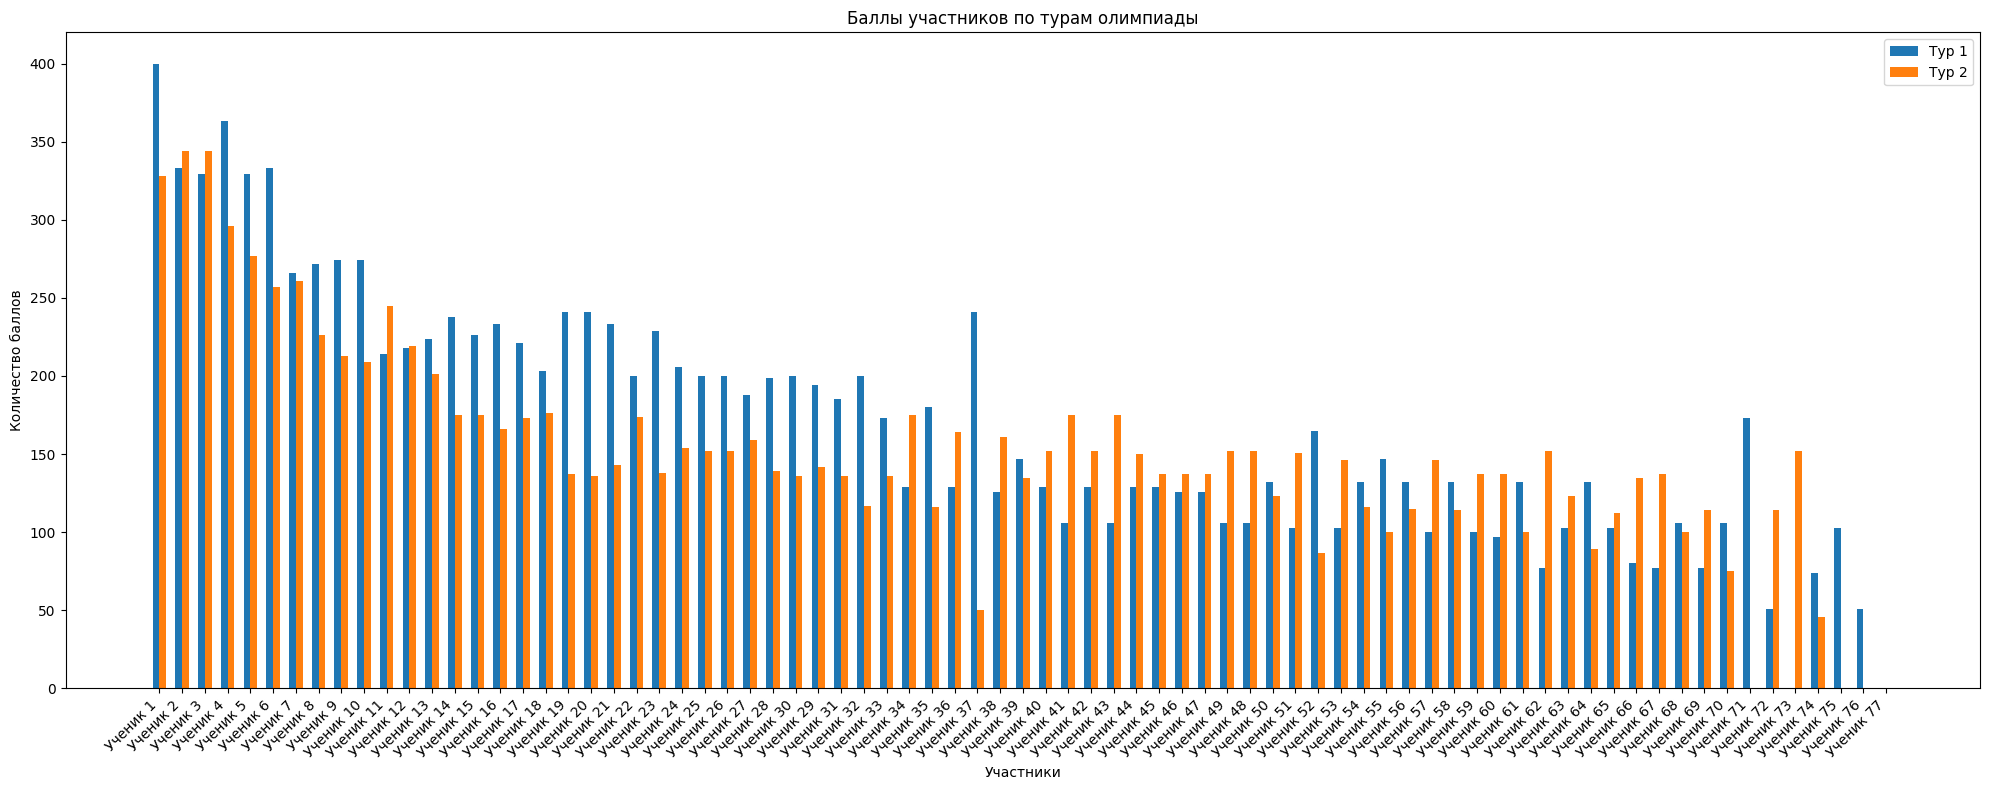

In [135]:
df_sorted_total = df.sort_values(by='total',ascending=False)

participants = df_sorted_total['name'].tolist()
total_1 = df_sorted_total['total_1'].tolist()
total_2 = df_sorted_total['total_2'].tolist()

bar_width = 0.3

fig, ax = plt.subplots(figsize=(20, 8))
bars1 = ax.bar(participants, total_1, bar_width, label='Тур 1')
bars2 = ax.bar([p + bar_width for p in range(len(participants))], total_2, bar_width, label='Тур 2')

ax.set_ylabel('Количество баллов')
ax.set_xlabel('Участники')
ax.set_title('Баллы участников по турам олимпиады')
ax.set_xticks([p + bar_width / 2 for p in range(len(participants))])
ax.set_xticklabels(participants, rotation=45, ha='right')

# Добавляем легенду
ax.legend()

# Отображаем график
plt.tight_layout()
plt.show()

Определяем количество победителей и призеров по школам:

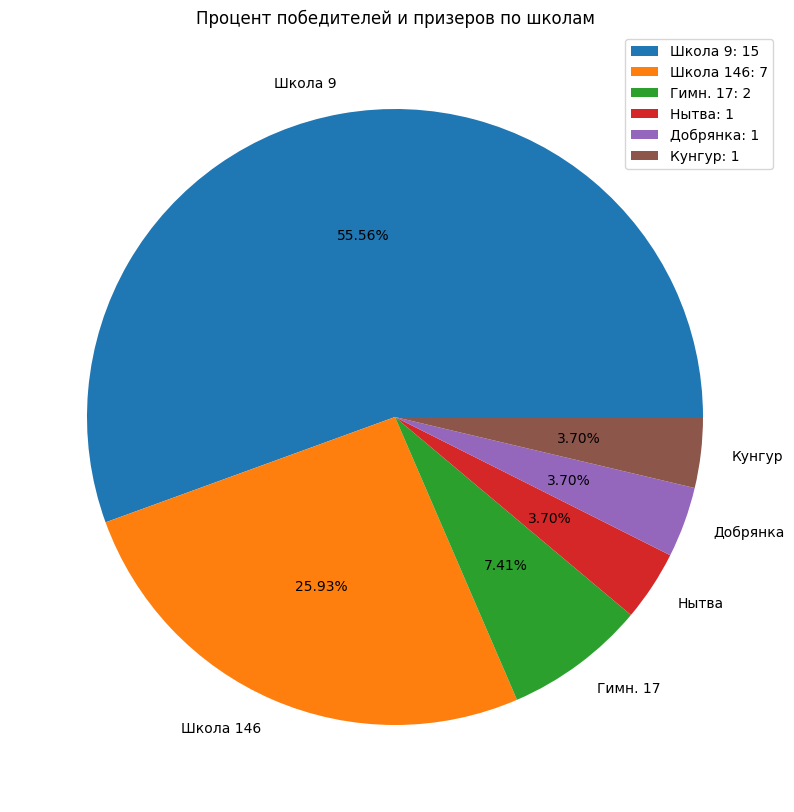

In [136]:
df_filtered = df[df['status'].notnull()]

school_counts = df_filtered['school'].value_counts()

plt.figure(figsize=(12, 10))
pie = school_counts.plot(kind='pie', autopct='%1.2f%%')
school_counts_abs = school_counts.values
legend_labels = [f'{school}: {count}' for school, count in zip(school_counts.index, school_counts_abs)]
plt.legend(legend_labels, loc='best')
plt.title('Процент победителей и призеров по школам')
plt.ylabel('')
plt.show()

Выявление отличий между классами:

In [137]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77 entries, 0 to 76
Data columns (total 16 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   name     77 non-null     object 
 1   school   77 non-null     object 
 2   class    77 non-null     int64  
 3   A        77 non-null     float64
 4   B        77 non-null     float64
 5   C        77 non-null     float64
 6   D        77 non-null     float64
 7   total_1  77 non-null     int64  
 8   E        77 non-null     float64
 9   F        77 non-null     float64
 10  G        77 non-null     float64
 11  H        77 non-null     float64
 12  total_2  77 non-null     int64  
 13  total    77 non-null     int64  
 14  place    77 non-null     int64  
 15  status   27 non-null     object 
dtypes: float64(8), int64(5), object(3)
memory usage: 9.8+ KB


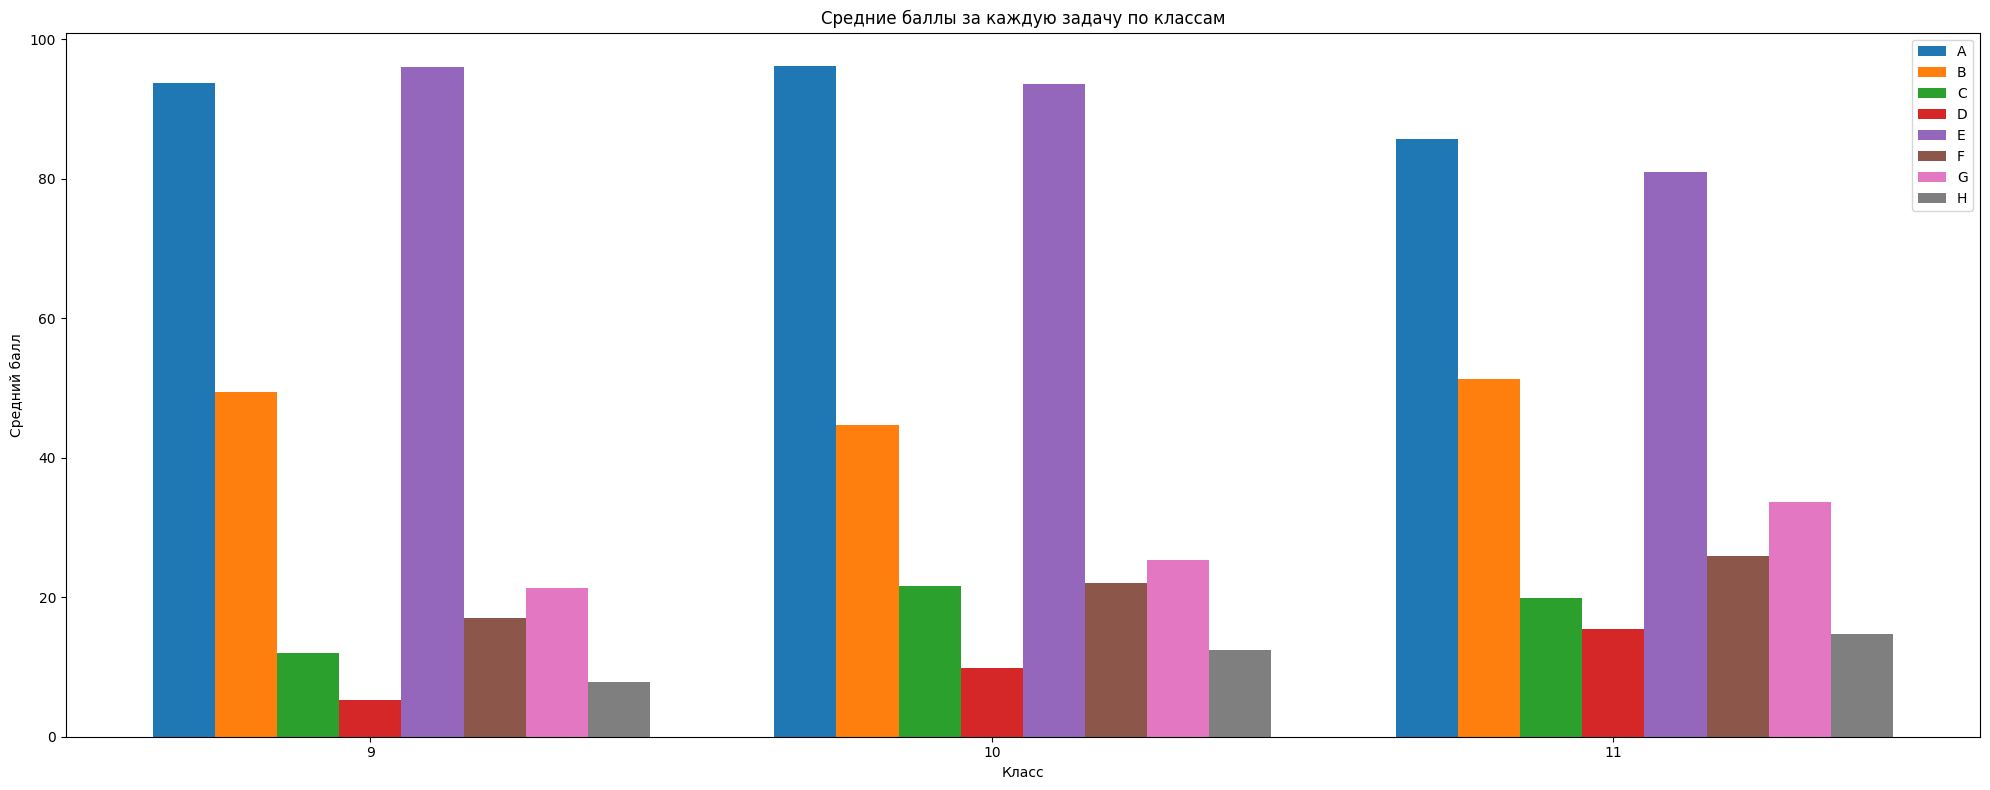

In [138]:
df.loc[df['class']==8, 'class'] = 9
grouped_df = df.groupby('class').agg({
    'class': 'first',  # Сохраняем значения столбца "class" без изменений
    'A': 'mean',
    'B': 'mean',
    'C': 'mean',
    'D': 'mean',
    'E': 'mean',
    'F': 'mean',
    'G': 'mean',
    'H': 'mean',
    'total_1': 'mean',
    'total_2': 'mean',
    'total': 'mean'
})
tasks = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H']
std_class = grouped_df['class'].tolist()

bar_width = 0.1

fig, ax = plt.subplots(figsize=(20, 8))

for i, task in enumerate(tasks):
    step = i - 3
    ax.bar(
        [p + step * bar_width for p in range(len(std_class))], 
        grouped_df[task].to_list(), 
        bar_width, 
        label=task
    )

# Добавляем названия осей и заголовок
ax.set_ylabel('Средний балл')
ax.set_xlabel('Класс')
ax.set_title('Средние баллы за каждую задачу по классам')

# Добавляем легенду
ax.legend()
ax.set_xticks(range(len(std_class)))
ax.set_xticklabels(std_class)

# Добавляем легенду
ax.legend()
# Отображаем график
plt.tight_layout()
plt.show()

